# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

## Merage and Join

left_df
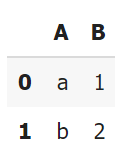

In [ ]:
left_df  = pd.DataFrame({'A':['a','b'],'B':[1,2]})
left_df

,A,B
0,a,1
1,b,2


right_df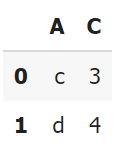

In [ ]:
right_df  = pd.DataFrame({'A':['c','d'],'C':[3,4]})
right_df

,A,C
0,c,3
1,d,4


### Join

In [ ]:
joined_df = left_df.join(right_df,lsuffix = '_L',rsuffix = '_R')

In [ ]:
joined_df

,A_L,B,A_R,C
0,a,1,c,3
1,b,2,d,4


In [ ]:
left_df.join(right_df,lsuffix = '_L',rsuffix = '_R',how = 'outer')

,A_L,B,A_R,C
0,a,1,c,3
1,b,2,d,4


### Merge

In [ ]:
joined_df = left_df.merge(right_df,on = 'A',how = 'outer')

In [ ]:
joined_df

,A,B,C
0,a,1.0,NaN
1,b,2.0,NaN
2,c,NaN,3.0
3,d,NaN,4.0


In [ ]:
left_df2 = left_df.copy()
left_df2

,A,B
0,a,1
1,b,2


In [ ]:
left_df2['C'] = left_df['A']
left_df2

,A,B,C
0,a,1,a
1,b,2,b


In [ ]:
joined_df = left_df2.merge(right_df,left_on = 'C',right_on = 'A',how ='left')
joined_df

,A_x,B,C_x,A_y,C_y
0,a,1,a,NaN,NaN
1,b,2,b,NaN,NaN


## Dealing with missing values

In [ ]:
df = pd.read_csv('Operations_empty.csv')
df.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
1,10001,Company,Cash,NaN,651750.0,1043,Japan,Asia
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,NaN,1024,Argentina,America


### Drop NA

In [ ]:
df.shape

(19, 8)

In [ ]:
df.isna().sum()

Customer         0
Customer Type    0
Payment Type     0
Purchases        0
Sales            0
Refunds          0
Country          0
Continent        0
dtype: int64

In [ ]:
df.dropna(subset = ['Purchases'],axis = 0,inplace = True)
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,NaN,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


### Replace NA

In [ ]:
df['Sales'].replace(np.nan,int(df['Sales'].mean()),inplace = True)
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


## Dealing with duplicate data

In [100]:
data_df = {'Name': ['Arpit', 'Riya','Priyanka', 'Aman', 'Arpit', 'Rohan', 'Riya', 'Sakshi'],
            'Employment Type':['Full-time Employee','Part-time Employee','Intern','Intern','Full-time Employee','Part-time Employee','Part-time Employee','Full-time Employee'],
            'Department':['Administration','Marketing','Technical','Marketing','Administration','Technical','Marketing','Administration']}
df_emp = pd.DataFrame(data_df)
df_emp

,Name,Employment Type,Department
0,Arpit,Full-time Employee,Administration
1,Riya,Part-time Employee,Marketing
2,Priyanka,Intern,Technical
3,Aman,Intern,Marketing
4,Arpit,Full-time Employee,Administration
5,Rohan,Part-time Employee,Technical
6,Riya,Part-time Employee,Marketing
7,Sakshi,Full-time Employee,Administration


In [106]:
df_emp.duplicated().sum()

0

In [102]:
bool_series = df_emp.duplicated(keep='first')
bool_series

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7    False
dtype: bool

In [105]:
df_emp = df_emp[~bool_series]

## Data Formatting

In [107]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [111]:
df['Purchases in Thousand'] = df['Purchases']/1000
df['Sales in Thousand'] = df['Sales']/1000
df['Refunds in Thousand'] = df['Refunds']/1000

In [110]:
df.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in Thousand,Sales in Thousand,Refunds in Thousand
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.000,150.000,0.240
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.000,563.750,0.902
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.000,706.250,1.130
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.300,553.509,1.024
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.500,519.375,0.000
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,696.300,870.375,1.392
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,741.000,926.250,1.482
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,541.000,676.250,1.082
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,83.000,103.750,0.166
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,454.100,567.925,0.910


In [113]:
df = df.astype({'Customer':'object'})
df.dtypes

Customer                  object
Customer Type             object
Payment Type              object
Purchases                float64
Sales                    float64
Refunds                    int64
Country                   object
Continent                 object
Purchases in Thousand    float64
Sales in Thousand        float64
Refunds in Thousand      float64
dtype: object

## Data Scaling

In [115]:
df_employee = pd.read_csv('Employees.csv')
df_employee

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,23,1,500,Single,Elementary
1,2,1000002,Peter,Hank,30,3,900,Married,High School
2,3,1000003,Jack,Sullivan,27,2,900,Married,High School
3,4,1000004,Marco,Aurelio,40,8,1500,Married,Master Degree
4,5,1000005,Claudia,Perez,35,5,1300,Single,Master Degree
5,6,1000006,Sally,Royal,19,1,1400,Single,Graduate
6,7,1000007,Peter,Miller,33,4,600,Married,Graduate
7,8,1000008,Susan,Gordon,35,10,2000,Married,Master Degree


### Simple Feature Scaling

In [117]:
df_norm1 = df_employee.copy()
df_norm1

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,23,1,500,Single,Elementary
1,2,1000002,Peter,Hank,30,3,900,Married,High School
2,3,1000003,Jack,Sullivan,27,2,900,Married,High School
3,4,1000004,Marco,Aurelio,40,8,1500,Married,Master Degree
4,5,1000005,Claudia,Perez,35,5,1300,Single,Master Degree
5,6,1000006,Sally,Royal,19,1,1400,Single,Graduate
6,7,1000007,Peter,Miller,33,4,600,Married,Graduate
7,8,1000008,Susan,Gordon,35,10,2000,Married,Master Degree


In [121]:
df_norm1['Age'] = df_norm1['Age']/df_norm1['Age'].max()
df_norm1['Salary'] = df_norm1['Salary']/df_norm1['Salary'].max()

In [122]:
df_norm1

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,0.575,1,0.25,Single,Elementary
1,2,1000002,Peter,Hank,0.750,3,0.45,Married,High School
2,3,1000003,Jack,Sullivan,0.675,2,0.45,Married,High School
3,4,1000004,Marco,Aurelio,1.000,8,0.75,Married,Master Degree
4,5,1000005,Claudia,Perez,0.875,5,0.65,Single,Master Degree
5,6,1000006,Sally,Royal,0.475,1,0.70,Single,Graduate
6,7,1000007,Peter,Miller,0.825,4,0.30,Married,Graduate
7,8,1000008,Susan,Gordon,0.875,10,1.00,Married,Master Degree


### Min-Max scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
df_norm2 = df_employee.copy()

In [136]:
scaler = MinMaxScaler()
df_norm2[['Age','Salary']] = scaler.fit_transform(df_norm2[['Age','Salary']])
df_norm2

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,0.190476,1,0.000000,Single,Elementary
1,2,1000002,Peter,Hank,0.523810,3,0.266667,Married,High School
2,3,1000003,Jack,Sullivan,0.380952,2,0.266667,Married,High School
3,4,1000004,Marco,Aurelio,1.000000,8,0.666667,Married,Master Degree
4,5,1000005,Claudia,Perez,0.761905,5,0.533333,Single,Master Degree
5,6,1000006,Sally,Royal,0.000000,1,0.600000,Single,Graduate
6,7,1000007,Peter,Miller,0.666667,4,0.066667,Married,Graduate
7,8,1000008,Susan,Gordon,0.761905,10,1.000000,Married,Master Degree


### Standard Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
df_norm3 = df_employee.copy()

In [138]:
scaler = StandardScaler()
df_norm3[['Age','Salary']] = scaler.fit_transform(df_norm3[['Age','Salary']])
df_norm3

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,-1.116211,1,-1.351972,Single,Elementary
1,2,1000002,Peter,Hank,-0.038490,3,-0.503676,Married,High School
2,3,1000003,Jack,Sullivan,-0.500370,2,-0.503676,Married,High School
3,4,1000004,Marco,Aurelio,1.501111,8,0.768768,Married,Master Degree
4,5,1000005,Claudia,Perez,0.731310,5,0.344620,Single,Master Degree
5,6,1000006,Sally,Royal,-1.732051,1,0.556694,Single,Graduate
6,7,1000007,Peter,Miller,0.423390,4,-1.139898,Married,Graduate
7,8,1000008,Susan,Gordon,0.731310,10,1.829139,Married,Master Degree


## Grouping Numerical Value into Classes

In [140]:
df.head(3)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in Thousand,Sales in Thousand,Refunds in Thousand
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.0,150.00,0.240
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.0,563.75,0.902
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.0,706.25,1.130


In [143]:
my_class = np.linspace(start = df['Sales'].min(),stop = df['Sales'].max(), num = 4)
my_class

array([103750.        , 377916.66666667, 652083.33333333, 926250.        ])

In [144]:
group_names = ['Low','Medium','High']

In [146]:
df['Group Sales'] = pd.cut(df['Sales'],my_class,labels = group_names,include_lowest = True)

In [148]:
df.head(3)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in Thousand,Sales in Thousand,Refunds in Thousand,Group Sales
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.0,150.00,0.240,Low
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.0,563.75,0.902,Medium
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.0,706.25,1.130,High


## Converting a categorical variable to numeric.

In [150]:
df_dummies = pd.get_dummies(df['Payment Type'])

In [151]:
pd.concat([df,df_dummies],axis = 1)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in Thousand,Sales in Thousand,Refunds in Thousand,Group Sales,Cash,Credit Card,Transfer
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.000,150.000,0.240,Low,1,0,0
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.000,563.750,0.902,Medium,0,1,0
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.000,706.250,1.130,High,0,0,1
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.300,553.509,1.024,Medium,0,0,1
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.500,519.375,0.000,Medium,0,0,1
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,696.300,870.375,1.392,High,0,1,0
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,741.000,926.250,1.482,High,1,0,0
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,541.000,676.250,1.082,High,1,0,0
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,83.000,103.750,0.166,Low,1,0,0
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,454.100,567.925,0.910,Medium,1,0,0


# EDA

In [153]:
df_operations = pd.read_csv('Operations.csv')

## Univariate non-graphical EDA: Categorical Data

In [154]:
df_operations.describe(include = [object])

,Customer Type,Payment Type,Country,Continent
count,19,19,19,19
unique,2,3,8,3
top,Company,Cash,EEUU,America
freq,10,8,6,14


## Univariate non-graphical EDA: Numerical Data

In [157]:
df_operations['Payment Type'].value_counts()

Cash           8
Transfer       6
Credit Card    5
Name: Payment Type, dtype: int64

In [158]:
df_operations.describe()

,Customer,Purchases,Sales,Refunds
count,19.000000,19.000000,19.000000,19.000000
mean,10009.000000,450589.210526,563252.210526,819.210526
std,5.627314,167280.787361,209101.355900,439.467554
min,10000.000000,83000.000000,103750.000000,0.000000
25%,10004.500000,388850.000000,486062.500000,592.000000
50%,10009.000000,454100.000000,567925.000000,910.000000
75%,10013.500000,531200.000000,664000.000000,1062.500000
max,10018.000000,741000.000000,926250.000000,1482.000000


## Univariate Graphical EDA: Categorical Data

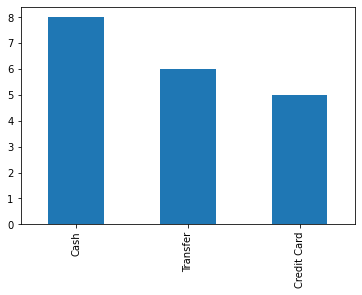

In [164]:
df_operations['Payment Type'].value_counts().plot.bar()

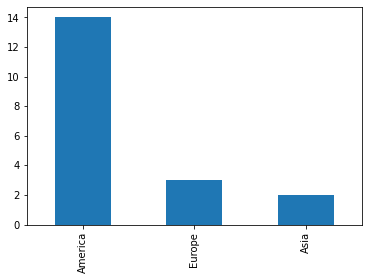

In [165]:
df_operations['Continent'].value_counts().plot.bar()

## Univariate Graphical EDA: Numerical Data

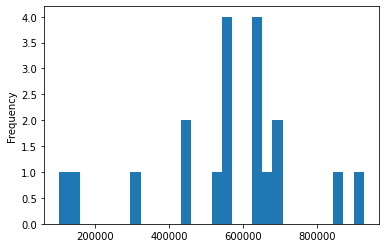

### Histogram

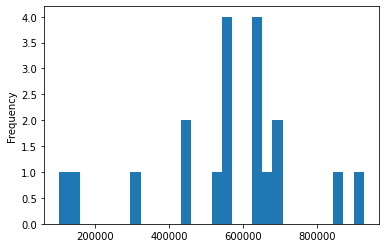

In [162]:
df_operations['Sales'].plot.hist(bins=30)

### Boxplot

In [170]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Box Plot')

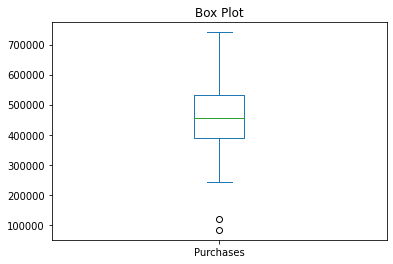

In [173]:
df_operations['Purchases'].plot(kind = 'box')
plt.title('Box Plot')

## Multivariate Graphical EDA

In [174]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


In [175]:
import seaborn as sns

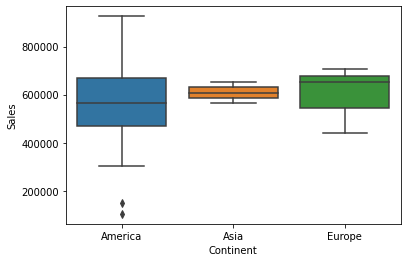

In [177]:
sns.boxplot(x = 'Continent',y = 'Sales',data = df_operations)

### Scatter Plot

In [182]:
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_fat.head(3)

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%


In [183]:
df_fat.shape

(170, 32)

In [186]:
df_fat.isna().sum()

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Miscellaneous                   0
Milk - Excluding Butter         0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered                       0
Active        

In [185]:
df_fat = df_fat.dropna()

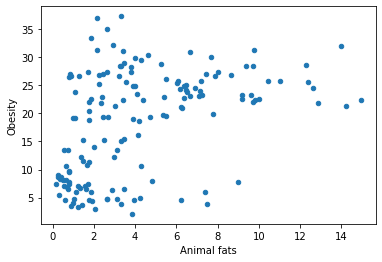

In [191]:
df_fat.plot.scatter(x = 'Animal fats',y = 'Obesity')

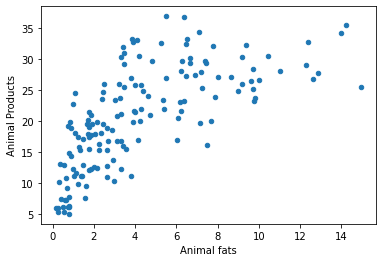

In [192]:
df_fat.plot.scatter(x = 'Animal fats',y = 'Animal Products')

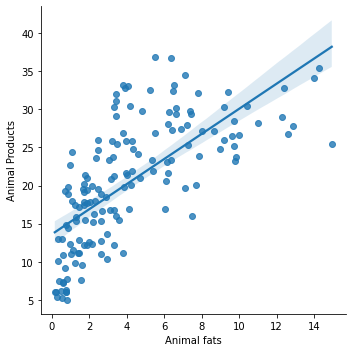

In [193]:
sns.lmplot(x = 'Animal fats',y = 'Animal Products',data = df_fat)

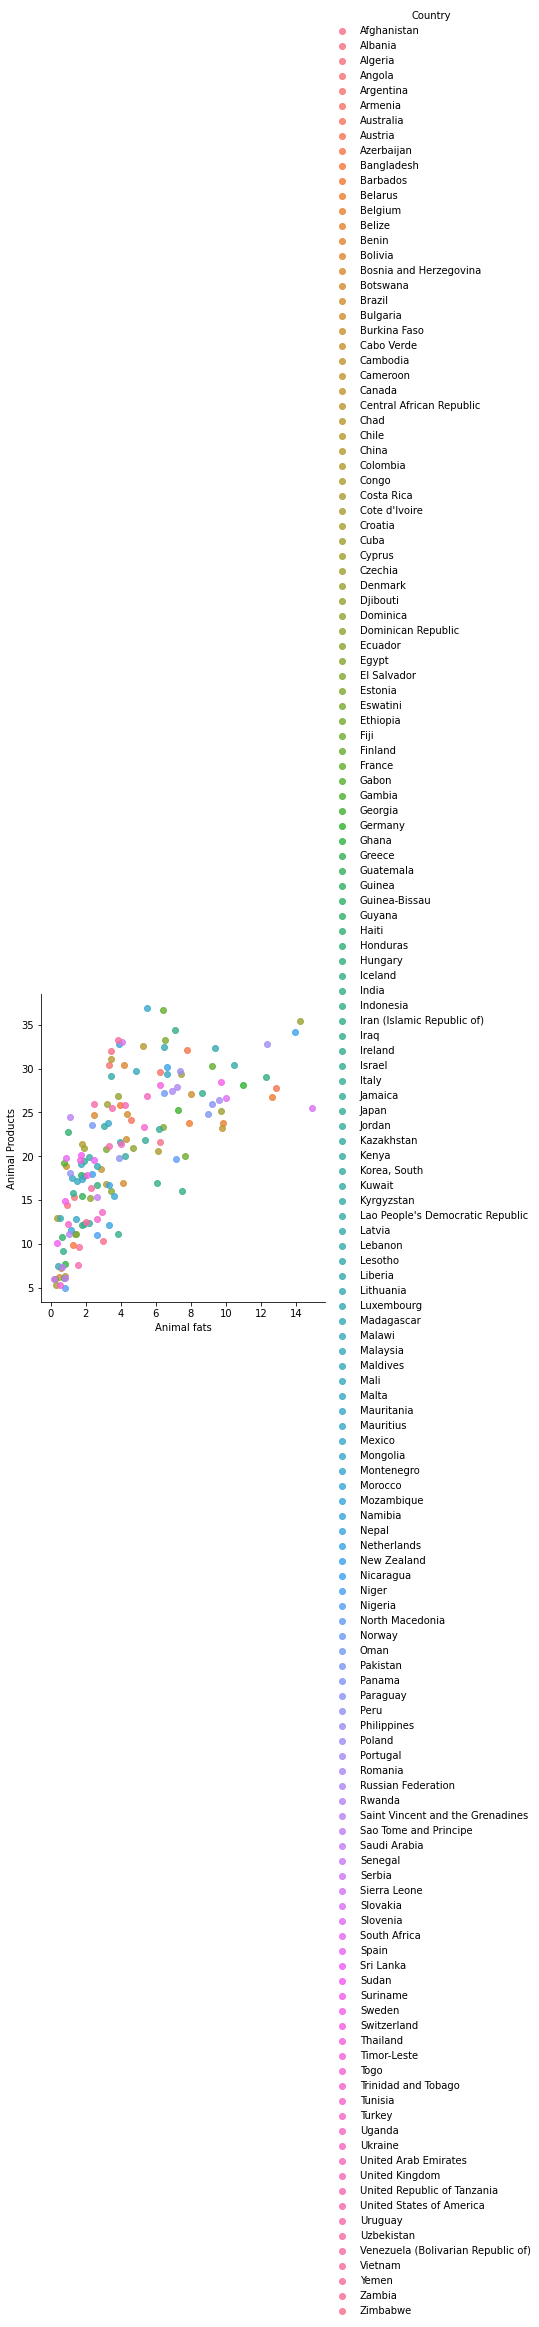

In [194]:
sns.lmplot(x = 'Animal fats',y = 'Animal Products',data = df_fat,hue = 'Country',fit_reg = True)

## Correlation Analysis



In [195]:
from scipy import stats

In [197]:
pearson_coef,p_value = stats.pearsonr(df_fat['Animal Products'],df_fat['Meat'])

In [200]:
pearson_coef

0.7328916489967817

In [199]:
p_value

4.857634042392233e-27

In [210]:
if p_value < 0.001:
    print("High certainty")
elif p_value < 0.05:
    print("Moderate certainty")
elif p_value < 0.1:
    print("Low certainty")
else:
    print("Lack of certainty")

High certainty


In [206]:
c = df_fat.corr()

In [205]:
c2 = df_fat[['Alcoholic Beverages','Animal Products']].corr()

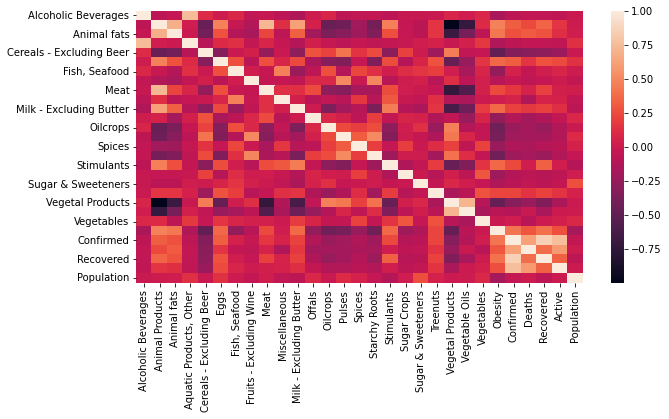

In [208]:
plt.figure(figsize = (10,5))
sns.heatmap(c)

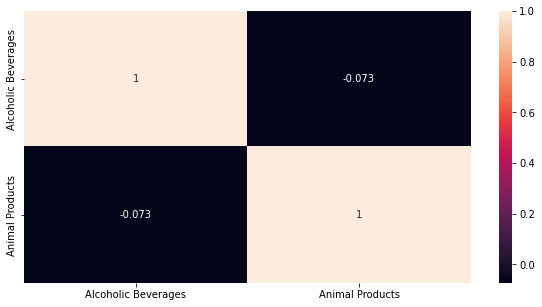

In [209]:
plt.figure(figsize = (10,5))
sns.heatmap(c2,annot = True)

In [211]:
from pandas.plotting import scatter_matrix

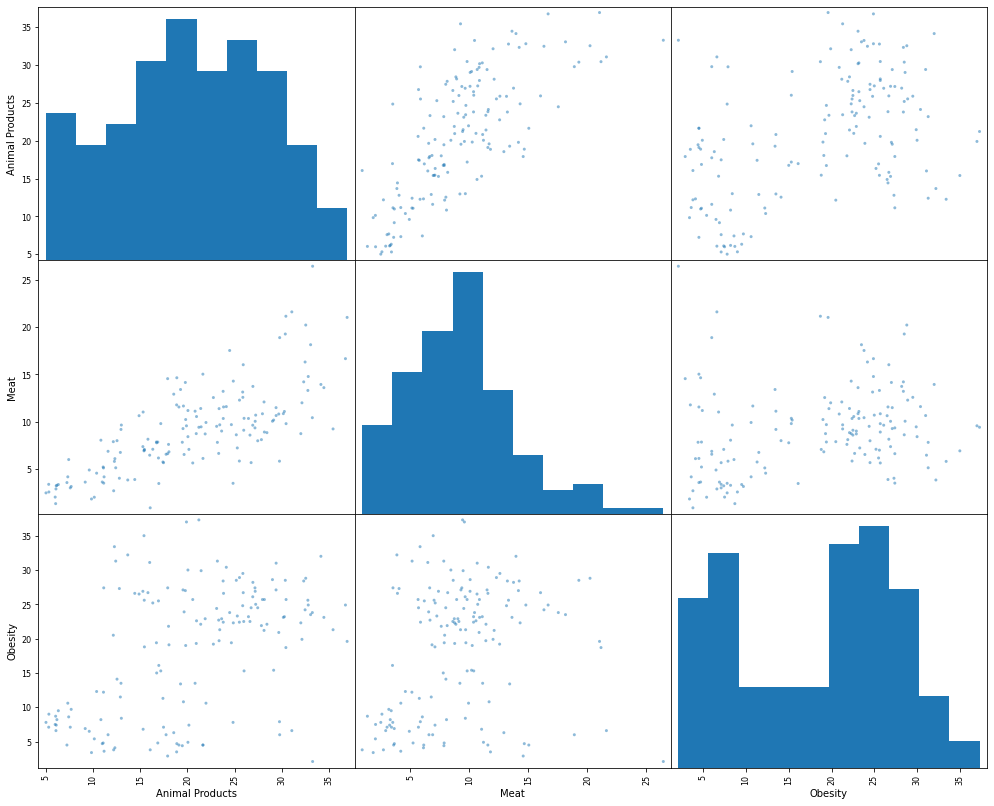

In [216]:
scatter_matrix(df_fat[['Animal Products','Meat','Obesity']], figsize = (17,14))
plt.show()

In [218]:
crosstab = pd.crosstab(index = df_operations['Country'],columns = df_operations['Payment Type'])

In [219]:
crosstab

Payment Type,Cash,Credit Card,Transfer
Country,,,
Argentina,0,0,1
Canada,1,2,1
Chile,1,0,0
EEUU,3,1,2
Germany,0,0,1
Japan,2,0,0
Mexico,0,2,0
Spain,1,0,1


In [222]:
cross_tab_prob = pd.crosstab(index = df_operations['Country'],columns = df_operations['Payment Type'],normalize = 'index')

In [223]:
cross_tab_prob

Payment Type,Cash,Credit Card,Transfer
Country,,,
Argentina,0.00,0.000000,1.000000
Canada,0.25,0.500000,0.250000
Chile,1.00,0.000000,0.000000
EEUU,0.50,0.166667,0.333333
Germany,0.00,0.000000,1.000000
Japan,1.00,0.000000,0.000000
Mexico,0.00,1.000000,0.000000
Spain,0.50,0.000000,0.500000


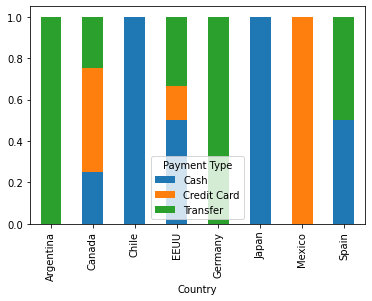

In [226]:
cross_tab_prob.plot(kind = 'bar',stacked = True)

## Workshop : Car Dataset

In [227]:
import pandas as pd
import numpy as np

In [229]:
df = pd.read_csv("car_data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [230]:
df.shape

(11914, 16)

In [231]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [235]:
df.duplicated().sum()

0

In [234]:
df = df.drop_duplicates()

In [238]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [237]:
df = df.dropna()

In [240]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
Price                  int64
dtype: object

In [239]:
df = df.rename(columns={"MSRP": "Price"})
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


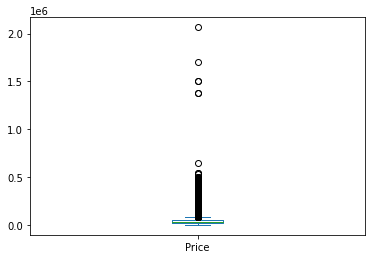

In [241]:
df['Price'].plot(kind='box')

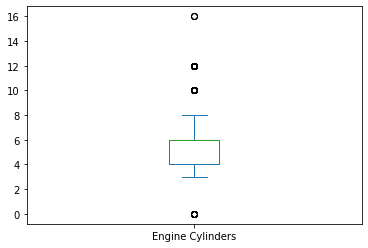

In [242]:
df['Engine Cylinders'].plot(kind='box')

In [245]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [246]:
Q1

Year                 2010.0
Engine HP             194.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            520.0
Price               26225.0
Name: 0.25, dtype: float64

In [247]:
Q3

Year                 2016.0
Engine HP             325.0
Engine Cylinders        6.0
Number of Doors         4.0
highway MPG            30.0
city mpg               22.0
Popularity           2009.0
Price               49477.5
Name: 0.75, dtype: float64

In [248]:
IQR = Q3 - Q1
IQR

Year                    6.0
Engine HP             131.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
Popularity           1489.0
Price               23252.5
dtype: float64

In [249]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


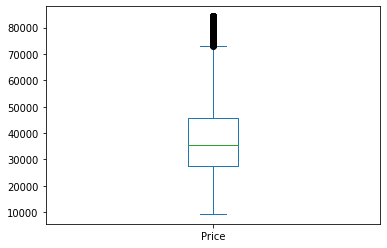

In [250]:
df['Price'].plot(kind='box')

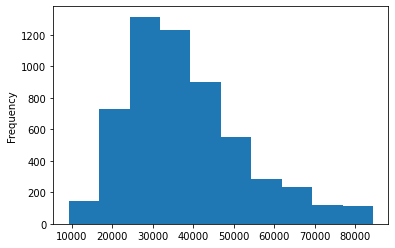

In [251]:
df['Price'].plot.hist()

Text(0.5, 0, 'Make')

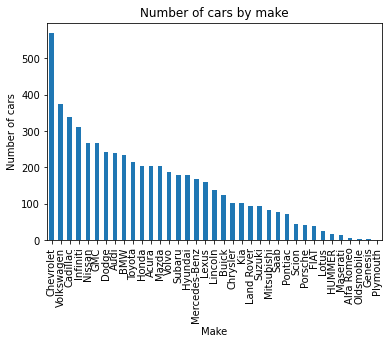

In [252]:
df['Make'].value_counts().plot(kind='bar')
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [253]:
c = df.corr()
c

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Price
Year,1.000000,0.151051,-0.173957,0.121819,0.344971,0.320515,0.194030,0.224195
Engine HP,0.151051,1.000000,0.772090,-0.038800,-0.558102,-0.646821,0.089515,0.757838
Engine Cylinders,-0.173957,0.772090,1.000000,-0.002469,-0.709868,-0.749259,0.021924,0.518301
Number of Doors,0.121819,-0.038800,-0.002469,1.000000,-0.045712,0.003745,-0.098174,0.015691
highway MPG,0.344971,-0.558102,-0.709868,-0.045712,1.000000,0.924245,0.109159,-0.308098
city mpg,0.320515,-0.646821,-0.749259,0.003745,0.924245,1.000000,0.062135,-0.381777
Popularity,0.194030,0.089515,0.021924,-0.098174,0.109159,0.062135,1.000000,0.141315
Price,0.224195,0.757838,0.518301,0.015691,-0.308098,-0.381777,0.141315,1.000000


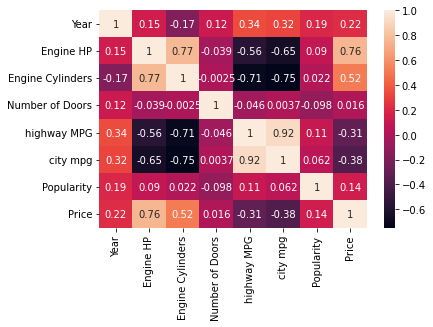

In [254]:
sns.heatmap(c, annot=True)

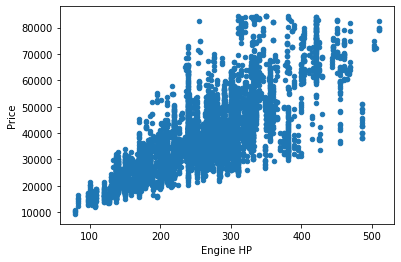

In [255]:
df.plot(kind='scatter', x='Engine HP', y='Price')